# Continuous Distribution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

#from matplotlib.mlab import frange

## Normal Distribution

* also called the Gaussian distribution 
* is characterized by a mean value $μ$, and a standard deviation $σ$
* its Probability Density Function (PDF) is given by:

$$f_{\mu,\sigma}(x)=\frac{1}{\sigma\sqrt{2\pi}}e^{\frac{(x-\mu)^2}{2\sigma^2}}$$

Specifically, if a normal distribution has a 0 mean and 1 standard deviation, we called it <b>standard normal distribution</b>. 

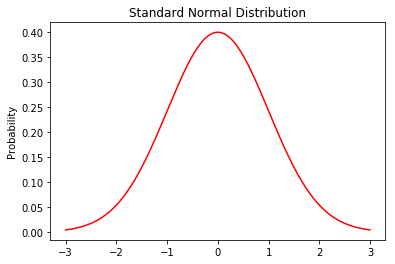

In [5]:
x=np.linspace(-3,3,1000)
const=1/np.sqrt(2*np.pi)
pdf_normal_dist=const*np.exp((-x**2)/2)
plt.figure()
plt.plot(x,pdf_normal_dist, color='r')
plt.title('Standard Normal Distribution')
plt.ylabel('Probability')
plt.show()

/usr/lib/python3/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


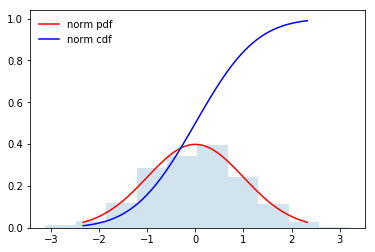

In [25]:
fig, ax = plt.subplots(1, 1)

snd=stats.norm()
# display the probability density function (``pdf``):
x = np.linspace(snd.ppf(0.01),  snd.ppf(0.99), 100) # Percent point function
ax.plot(x, snd.pdf(x),'r-', label='norm pdf')
ax.plot(x, snd.cdf(x),'b-', label='norm cdf')

# generate random numbers:
r = snd.rvs(size=1000)
# and compare the histogram:
ax.hist(r, normed=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

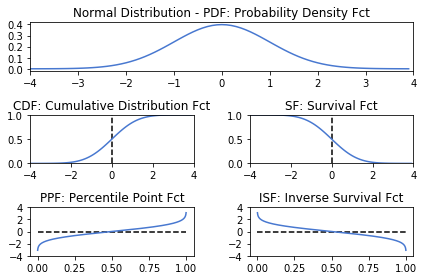

In [27]:
x = np.arange(-4,4,0.1) # generate the desirded x-values
x2 = np.arange(0,1,0.001)

nd = stats.norm()   # First simply define the normal distribution;

ax = plt.subplot2grid((3,2),(0,0), colspan=2) # the first row is taken up completely by the PDF

plt.plot(x,nd.pdf(x))
plt.xlim([-4,4])
plt.gca().xaxis.set_ticks_position('bottom')
plt.gca().yaxis.set_ticks_position('left')
plt.yticks(np.linspace(0, 0.4, 5))
plt.title('Normal Distribution - PDF: Probability Density Fct')
    
    # CDF
plt.subplot(323)
plt.plot(x,nd.cdf(x))
plt.gca().xaxis.set_ticks_position('bottom')
plt.gca().yaxis.set_ticks_position('left')
plt.xlim([-4,4])
plt.ylim([0,1])
plt.vlines(0, 0, 1, linestyles='--')
plt.title('CDF: Cumulative Distribution Fct')
    
    # SF
plt.subplot(324)
plt.plot(x,nd.sf(x))
plt.gca().xaxis.set_ticks_position('bottom')
plt.gca().yaxis.set_ticks_position('left')
plt.xlim([-4,4])
plt.ylim([0,1])
plt.vlines(0, 0, 1, linestyles='--')
plt.title('SF: Survival Fct')
   
    # PPF
plt.subplot(325)
plt.plot(x2,nd.ppf(x2))
plt.gca().xaxis.set_ticks_position('bottom')
plt.gca().yaxis.set_ticks_position('left')
plt.yticks(np.linspace(-4,4,5))
plt.hlines(0, 0, 1, linestyles='--')
plt.ylim([-4,4])
plt.title('PPF: Percentile Point Fct')

    # ISF
plt.subplot(326)
plt.plot(x2,nd.isf(x2))
plt.gca().xaxis.set_ticks_position('bottom')
plt.gca().yaxis.set_ticks_position('left')
plt.yticks(np.linspace(-4,4,5))
plt.hlines(0, 0, 1, linestyles='--')
plt.title('ISF: Inverse Survival Fct')
plt.ylim([-4,4])
plt.tight_layout()

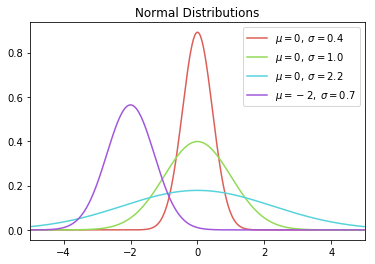

In [2]:
myMean = [0,0,0,-2]    # Select 3 mean values, and 3 SDs
mySD = [0.2,1,5,0.5]

t=np.arange(-5,5,0.02)
    
with sns.color_palette('hls', 4):     # Plot the 3 PDFs, using the color-palette "hls"
    for mu,sigma in zip(myMean, np.sqrt(mySD)):
        y = stats.norm.pdf(t, mu, sigma)
        plt.plot(t,y, label='$\mu={0}, \; \t\sigma={1:3.1f}$'.format(mu,sigma))
            
plt.legend() # Format the plot
plt.xlim([-5,5])
plt.title('Normal Distributions')
plt.show()

## Continuous Distributions Derived from the Normal Distribution

* t-Distribution <br>
The sample distribution of mean values for samples from a
normally distributed population. Typically used for small sample numbers, when
the true mean/SD are not known. <br>
Since in most cases the population mean and its variance are unknown, one
typically works with the t-distribution when analyzing sample data. <br>
If $\bar{x}$ is the sample mean, and $s$ the sample standard deviation, the resulting statistic is

$$ t=\frac{\bar{x}-\mu}{s /\sqrt{n}}=\frac{\bar{x}-\mu}{SE} $$

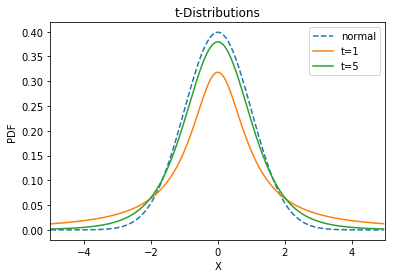

In [4]:
t = np.arange(-5, 5, 0.05)
   
normal = stats.norm.pdf(t)
t1 = stats.t.pdf(t,1)
t5 = stats.t.pdf(t,5)
    
plt.plot(t,normal, '--',  label='normal')
plt.plot(t, t1, label='t=1')
plt.plot(t, t5, label='t=5')

plt.legend()   
plt.xlim([-5,5])
plt.title('t-Distributions')
plt.xlabel('X')
plt.ylabel('PDF')
plt.show()

## Chi-Square Distribution

The chi-square distribution is related to the normal distribution in a simple way:<br>
if a random variable $X$ has a normal distribution $(X \in N(0,1))$, then $X^2$ has a chi-square distribution, with one degree of freedom $(X^2 \in \chi_1^2 )$.

Suppose we have n independent random variables $X_i$ such that $X_i$ behaves like a standard normal distribution.
* We are interested in the following random variable $R=\sqrt{\sum_iX_i^2}$
The joint probability density of X i is the following
$$ f_\mathbf{X}(X)=\frac{e^{-1/2}\sum_iX_i^2}{(2\pi)^{n/2}} $$
Now, consider $R$ as the radius of an n-dimensional sphere. The volume of this sphere is given by
$$ V_n(R)=\frac{\pi^{n/2}}{\Gamma (n/2+1)}R^n $$
The differential of this volume is the following
$$ dV_n(R)=nAR^{n-1}dR $$
The probability (as always) integrates out to one
$$ \int f_{\mathbf{X}}(\mathbf{X})dV_n(\mathbf{X})=1 $$
In terms of R, the change of variable provides,
$$ \int f_{\mathbf{X}}(R)nAR^{n-1}dR $$
Thus,
$$ f_R(R):=f_{\mathbf{X}}(R)=nAR^{n-1}\frac{e^{-\frac{1}{2}R^2}}{(2\pi)^{n/2}} $$
* But we are interested in the distribution $Y = R^2$
$$ f_Y(Y)=nAY^{\frac{n-1}{2}}\frac{e^{-\frac{1}{2}Y}}{(2\pi)^{n/2}}\frac{1}{2\sqrt{Y}} $$
Then, finally substituting back in A gives the χ2 distribution with n degrees of
freedom,
$$ f_Y(Y)=\frac{2^{-\frac{n+2}{2}}n}{\Gamma(n/2+1)}e^{-\frac{1}{2}Y}Y^{\frac{n-2}{2}} $$

### Example

A pill producer is ordered to deliver pills with a standard deviation of $\sigma=0.05$ .
From the next batch of pills $n=13$ random samples have a weight of 3.04, 2.94,3.01, 3.00, 2.94, 2.91, 3.02, 3.04, 3.09, 2.95, 2.99, 3.10, 3.02 g.

Since the chi-square distribution describes the distribution of the summed squares of random variates from a standard normal distribution, we have to normalize our data before we calculate the corresponding CDF-value:
$$ SF_{\chi^2}=1-CDF\left(\sum\left(\frac{x-\bar{x}}{\sigma}\right)^2\right) $$

In [32]:
data = np.r_[3.04, 2.94, 3.01, 3.00, 2.94, 2.91, 3.02,3.04, 3.09, 2.95, 2.99, 3.10, 3.02]
sigma = 0.05
chi2Dist = stats.chi2(len(data)-1)
statistic = sum( ((data-np.mean(data))/sigma)**2 )
chi2Dist.sf(statistic)

0.19293306654285156

Interpretation: If the batch of pills is from a distribution with a standard deviation of $\sigma=0.05$, the likelihood of obtaining a chi-square value as large or larger than the one observed is about $19 %$, so it is not atypical. In other words, the batch matches the expected standard deviation.

The number of the DOF is $n -1$, because we are only interested in the shape of the distribution, and the mean value of the n data is subtracted from all data points.